In [1]:
import os
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from synthesized.core import BasicSynthesizer

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3138-2D31-322D-B531
Expires at: 2018-12-31 00:00:00


In [3]:
import numpy as np

In [4]:
def create_ball(x_mean, x_std, y_mean, y_std, size):
    mean = [x_mean, y_mean]
    cov = [[x_std, 0], [0, y_std]]
    x, y = np.random.multivariate_normal(mean, cov, size).T
    df = pd.DataFrame({'x': x, 'y': y})
    return df

In [5]:
def create_line(x_range, intercept, slope, y_std, size):
    x = np.random.uniform(low=x_range[0], high=x_range[1], size=size)
    y = intercept + x*slope + np.random.normal(loc=0, scale=y_std, size=size)
    df = pd.DataFrame({'x': x, 'y': y})
    return df

In [6]:
from scipy.stats import powerlaw
def create_power_law_distribution(a, scale, size):
    return pd.DataFrame({'x': scale*powerlaw.rvs(0.5, size=10000)})

In [7]:
def create_conditional_distibution(*norm_params, size):
    df = pd.DataFrame()
    for i, (mean, std) in enumerate(norm_params):
        x = [i] * size
        y = np.random.normal(mean, std, size)
        df = df.append(pd.DataFrame({'x': x, 'y': y}), ignore_index=True)
    df = df.sample(frac=1).reset_index(drop=True)
    df['x'] = df['x'].astype('category')
    return df

In [8]:
def plot_data(data, ax=None):
    if data.shape[1] == 2:
        if data['x'].dtype.kind == 'O':
            sns.violinplot(x="x", y="y", data=data, ax=ax)
        else:
            #return sns.jointplot(x="x", y="y", data=data, kind="kde", ax=ax)
            return ax.hist2d(data['x'], data['y'], bins=100)
    else:
        return sns.distplot(data, ax=ax)

In [28]:
import time
def synthesize_and_plot(data, n_iter=20000):
    start = time.time()
    with BasicSynthesizer(data=data, batch_size=128, capacity=64, exclude_encoding_loss=False) as synthesizer:
        synthesizer.learn(data=data, num_iterations=n_iter, verbose=n_iter/10)
        synthesized = synthesizer.synthesize(n=len(data))
        print('took', time.time() - start, 's')
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
        ax1.set_title('orig')
        ax2.set_title('synth')
        plot_data(data, ax=ax1)
        plot_data(synthesized, ax=ax2)

### Gauss "ball" outside of center

In [40]:
data = create_ball(x_mean=1000, x_std=100, y_mean=100, y_std=10, size=10000)

value types:
x continuous
y continuous
2000: 5.38e+02  (encoding: 225.79794311523438, regularization: 0.0030410976614803076, x: 82.74778747558594, y: 229.5906982421875)
4000: 6.35e+02  (encoding: 177.00799560546875, regularization: 0.0032712649554014206, x: 121.90367126464844, y: 335.7052307128906)
6000: 4.95e+02  (encoding: 217.02810668945312, regularization: 0.0035072769969701767, x: 98.85810089111328, y: 179.5400848388672)
8000: 5.40e+02  (encoding: 197.45526123046875, regularization: 0.003740286221727729, x: 95.11943054199219, y: 247.6145782470703)
10000: 5.54e+02  (encoding: 210.29090881347656, regularization: 0.003987324424088001, x: 105.96709442138672, y: 237.40182495117188)
12000: 5.35e+02  (encoding: 198.03445434570312, regularization: 0.004233437590301037, x: 90.42609405517578, y: 246.7712860107422)
14000: 5.42e+02  (encoding: 228.43515014648438, regularization: 0.004502110183238983, x: 116.08383178710938, y: 197.5980987548828)
16000: 6.10e+02  (encoding: 202.3964080810547, r

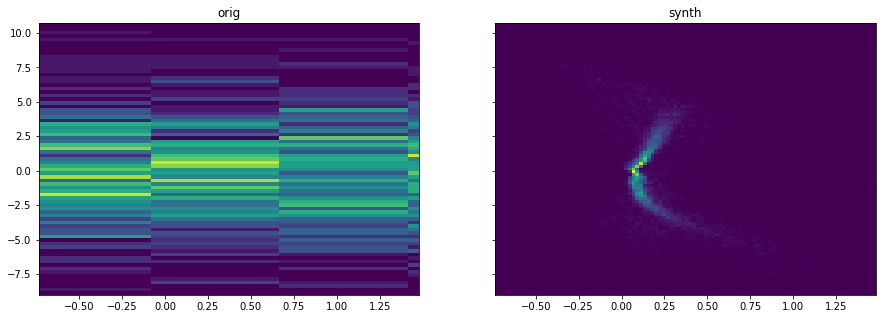

In [41]:
synthesize_and_plot(data)

### Gauss "ball" around of zero

In [12]:
data = create_ball(x_mean=0, x_std=100, y_mean=0, y_std=10, size=10000)

value types:
x continuous
y continuous
2000: 9.98e+00  (regularization: 0.002810164587572217, x: 2.29407000541687, y: 7.679750919342041)
4000: 1.33e+01  (regularization: 0.0028705517761409283, x: 0.9528486728668213, y: 12.38447380065918)
6000: 1.21e+01  (regularization: 0.0029303112532943487, x: 2.459017276763916, y: 9.671517372131348)
8000: 2.85e+00  (regularization: 0.0029850509017705917, x: 0.6242616176605225, y: 2.2177629470825195)
10000: 4.50e+00  (regularization: 0.0030422324780374765, x: 1.3782492876052856, y: 3.118086576461792)
12000: 1.88e+01  (regularization: 0.003100258531048894, x: 0.741299569606781, y: 18.076892852783203)
14000: 1.00e+01  (regularization: 0.0031576205510646105, x: 0.34499818086624146, y: 9.6726655960083)
16000: 1.11e+01  (regularization: 0.0032114319037646055, x: 1.4075939655303955, y: 9.716365814208984)
18000: 2.71e+00  (regularization: 0.0032648039050400257, x: 1.1556589603424072, y: 1.551962971687317)
20000: 1.90e+00  (regularization: 0.0033169100061059

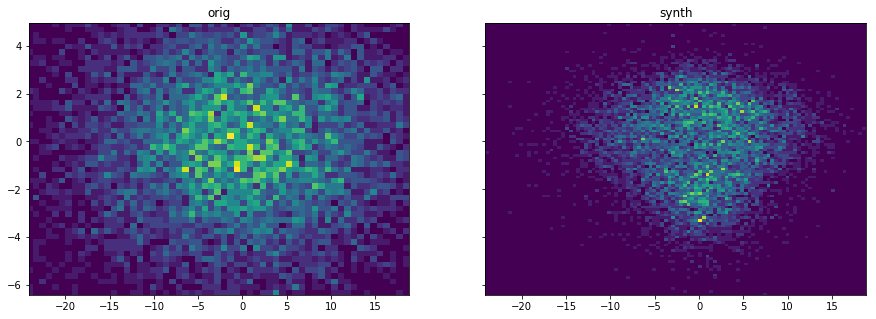

In [13]:
synthesize_and_plot(data)

### Line of noise that far from zero

In [23]:
data = create_line(x_range=(0, 1000), intercept=100, slope=-0.1, y_std=10, size=10000)

value types:
x continuous-positive-nonnegative
y continuous
2000: 2.88e+05  (regularization: 0.003456384874880314, x: 264086.46875, y: 24124.6640625)
4000: 2.58e+05  (regularization: 0.00433769216760993, x: 251550.03125, y: 6796.1484375)
6000: 1.03e+05  (regularization: 0.005789380986243486, x: 102332.6171875, y: 1115.028564453125)
8000: 1.25e+04  (regularization: 0.007545592729002237, x: 9710.119140625, y: 2819.4677734375)
10000: 1.08e+03  (regularization: 0.008320879191160202, x: 755.6466064453125, y: 319.43499755859375)
12000: 8.47e+02  (regularization: 0.008444812148809433, x: 298.32354736328125, y: 548.6697387695312)
14000: 1.33e+03  (regularization: 0.008581316098570824, x: 569.2374877929688, y: 762.1363525390625)
16000: 5.18e+02  (regularization: 0.008667832240462303, x: 356.810302734375, y: 160.9661407470703)
18000: 3.50e+02  (regularization: 0.008738045580685139, x: 159.5896759033203, y: 190.48365783691406)
20000: 1.61e+03  (regularization: 0.00881449319422245, x: 804.25958251

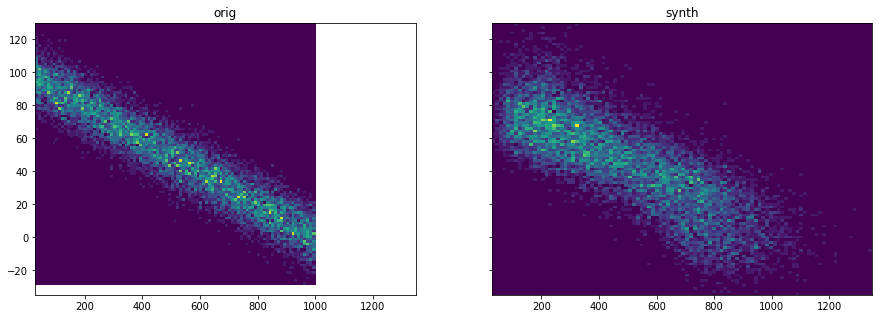

In [24]:
synthesize_and_plot(data)

### Line of noise that comes from zero

In [15]:
data = create_line(x_range=(0, 1000), intercept=0, slope=0.1, y_std=10, size=10000)

value types:
x continuous-positive-nonnegative
y continuous
2000: 2.88e+05  (regularization: 0.0036129422951489687, x: 265151.625, y: 22764.169921875)
4000: 1.87e+05  (regularization: 0.004707764834165573, x: 182678.3125, y: 4788.96533203125)
6000: 5.50e+04  (regularization: 0.0062703341245651245, x: 48776.56640625, y: 6211.1552734375)
8000: 3.20e+03  (regularization: 0.008075861260294914, x: 1472.1396484375, y: 1730.259521484375)
10000: 9.57e+03  (regularization: 0.008453533984720707, x: 5805.2578125, y: 3769.087158203125)
12000: 1.37e+03  (regularization: 0.00860678218305111, x: 388.0819091796875, y: 982.8296508789062)
14000: 9.00e+02  (regularization: 0.008713789284229279, x: 499.561767578125, y: 400.3863830566406)
16000: 4.74e+02  (regularization: 0.008816505782306194, x: 250.34397888183594, y: 223.39028930664062)
18000: 1.59e+03  (regularization: 0.008907975628972054, x: 499.4224853515625, y: 1094.7435302734375)
20000: 8.82e+02  (regularization: 0.008991435170173645, x: 244.722351

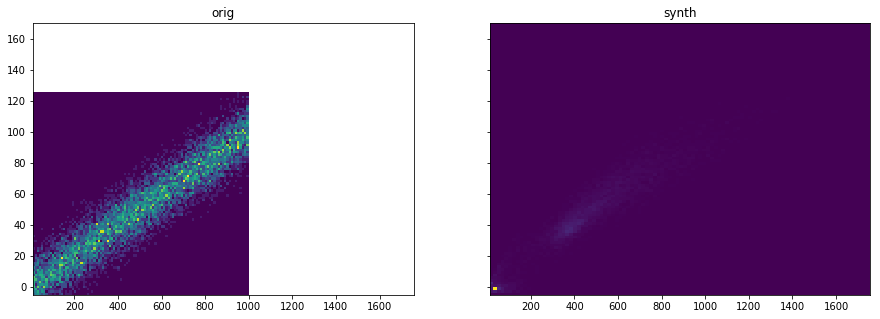

In [16]:
synthesize_and_plot(data)

### Power law distribution

In [32]:
data = create_power_law_distribution(a=0.5, scale=1000, size=10000)

value types:
x continuous-positive-nonnegative
3000: 1.42e+05  (encoding: 607.941650390625, regularization: 0.004515738692134619, x: 141236.3125)
6000: 1.28e+04  (encoding: 1170.6343994140625, regularization: 0.007031464017927647, x: 11588.919921875)
9000: 5.47e+03  (encoding: 1286.22265625, regularization: 0.007987317629158497, x: 4184.59228515625)
12000: 2.40e+03  (encoding: 1192.4935302734375, regularization: 0.008277896791696548, x: 1211.356689453125)
15000: 6.78e+03  (encoding: 1181.052734375, regularization: 0.008544656448066235, x: 5603.4697265625)
18000: 2.44e+03  (encoding: 1264.684814453125, regularization: 0.008851156570017338, x: 1172.540771484375)
21000: 2.08e+03  (encoding: 1242.475830078125, regularization: 0.00917837955057621, x: 836.1053466796875)
24000: 2.10e+03  (encoding: 1232.8096923828125, regularization: 0.009524309076368809, x: 868.6356201171875)
27000: 2.29e+03  (encoding: 1226.8721923828125, regularization: 0.009870858862996101, x: 1065.322265625)
30000: 1.80e

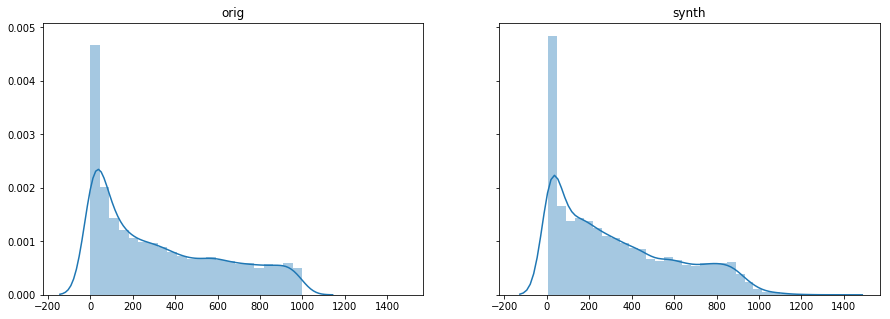

In [30]:
synthesize_and_plot(data, n_iter=30000)

### Conditional distribution

In [31]:
data = create_conditional_distibution((10,2), (20, 5), (30, 1), size=10000)

value types:
x categorical3-35
y continuous-positive-nonnegative
2000: 9.94e+00  (regularization: 0.0030938503332436085, x: -12.296028137207031, y: 22.236881256103516)
4000: 6.18e+01  (regularization: 0.003148105461150408, x: -12.297412872314453, y: 74.09156799316406)
6000: 1.38e+01  (regularization: 0.00320439413189888, x: -12.3026123046875, y: 26.123395919799805)
8000: 2.24e+00  (regularization: 0.0032786342781037092, x: -12.309432983398438, y: 14.545476913452148)
10000: 1.26e+00  (regularization: 0.003349382895976305, x: -12.315145492553711, y: 13.57315444946289)
12000: -1.30e+00  (regularization: 0.0034160506911575794, x: -12.315437316894531, y: 11.01193618774414)
14000: 3.73e+01  (regularization: 0.0034822917077690363, x: -12.31407356262207, y: 49.57622146606445)
16000: 8.21e+00  (regularization: 0.003546701744198799, x: -12.309784889221191, y: 20.520322799682617)
18000: 3.00e+01  (regularization: 0.00361682940274477, x: -12.310159683227539, y: 42.34754943847656)
20000: 4.42e+00  

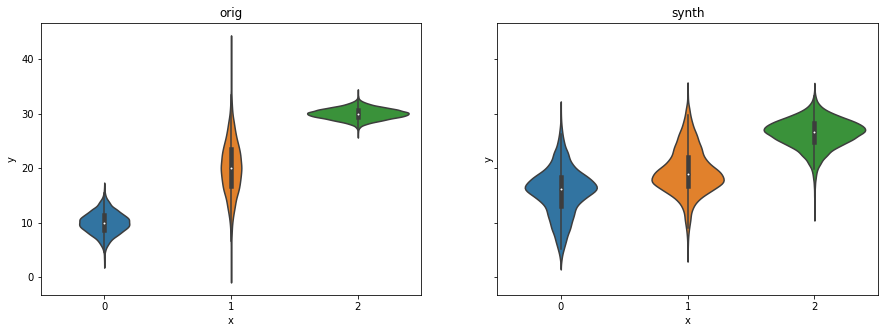

In [20]:
synthesize_and_plot(data)